<img align="center" src="https://raw.githubusercontent.com/FUlyankin/Parsers/master/images%20/cats.jpg" height="1200" width="1200"> 

# Мини-домашка 4: визуализация

У всех нас есть датасет по контакту. В нём лежит информация про всех нас. Эту информацию надо как следует проанализировать. Именно этим мы сейчас продолжим заниматься. В этот раз с картинками! 

Для начала подгрузите все необходимые библиотеки: `pandas`, `matplotlib.pyplot`, `seaborn` и включите опцию, отвечающую за прорисовку картинок прямо в питонячей тетрадке.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Подгрузите данные профилей и данные по фотографиям

In [2]:
# В этой табличке лежат данные по профилю человека
df_profile = pd.read_csv('../data/vk_download/vk_data_profile.csv',sep='\t')

# В этой табличке лежат данные по фотографиям человека
df_photo = pd.read_csv('../data/vk_download/vk_data_photo.csv',sep='\t')

Склеим табличку по полю uid

In [3]:
df = pd.merge(df_profile, df_photo, how='right', on='uid')
df.head()

,Unnamed: 0_x,uid,Unnamed: 0.1,first_name,last_name,is_closed,city,home_town,male_dummy,relation_cat,...,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text,photo_text_len_cnt,photo_yer_mean,vk_photo_ava_change_cnt,vk_photo_text_url_len_cnt,vk_photo_wall_ph_post_cnt
0,0,182152789,0,Александра,Абашкова,False,Москва,Москва,0,не указано,...,0.0,0.0,0.000000,0.0,,0.0,1.333333,0.0,0.0,0.0
1,1,148020433,1,Анастасия,Чуфистова,False,Рязань,Рязань,0,не указано,...,2.0,1.0,0.105263,0.0,,0.0,3.166667,0.0,0.0,0.0
2,2,138413935,2,Александр,Головачев,False,Москва,Омск,1,не женат/не замужем,...,0.0,0.0,0.000000,0.0,,0.0,2.333333,0.0,0.0,0.0
3,3,366261055,3,Анна,Лобанова,False,NaN,NaN,0,не указано,...,0.0,0.0,0.000000,0.0,,0.0,12.500000,0.0,0.0,0.0
4,4,111252392,4,Алексей,Пузырный,False,NaN,NaN,1,NaN,...,0.0,0.0,0.000000,0.0,,0.0,8.750000,0.0,0.0,0.0


Давайте посмотрим на все названия колонок, которые есть в таблице. 

In [4]:
df.columns

Index(['Unnamed: 0_x', 'uid', 'Unnamed: 0.1', 'first_name', 'last_name',
       'is_closed', 'city', 'home_town', 'male_dummy', 'relation_cat',
       'relation_partner', 'byear', 'bmonth', 'bday', 'country',
       'facebook_dummy', 'instagram_dummy', 'skype_dummy', 'twitter_dummy',
       'home_phone_dummy', 'mobile_phone_dummy', 'site_dummy', 'folowers_cnt',
       'university_str', 'faculty_str', 'about_str', 'activities_str',
       'books_str', 'interests_str', 'movies_str', 'music_str', 'quotes_str',
       'tv_str', 'games_str', 'can_post_dummy', 'can_see_all_posts_dummy',
       'can_see_audio_dummy', 'can_write_private_message_dummy',
       'has_mobile_dummy', 'has_ava_dummy', 'wall_comments_dummy',
       'albums_cnt', 'audio_cnt', 'followers_cnt', 'friends_cnt', 'gifts_cnt',
       'groups_cnt', 'mutual_friends_cnt', 'photos_cnt', 'subscriptions_cnt',
       'user_photos_cnt', 'videos_cnt', 'pages_cnt', 'alco_love_cat',
       'smoke_love_cat', 'religion_str', 'inspired_by

Мы видим, что часть из них кончается на `cnt`. Это колонки-счётчики. В них лежат такие переменные как количество фоток, лайков, репостов и тд

In [5]:
variables_cnt = [item for item in df.columns if item[-3:] == 'cnt']
variables_cnt

['folowers_cnt',
 'albums_cnt',
 'audio_cnt',
 'followers_cnt',
 'friends_cnt',
 'gifts_cnt',
 'groups_cnt',
 'mutual_friends_cnt',
 'photos_cnt',
 'subscriptions_cnt',
 'user_photos_cnt',
 'videos_cnt',
 'pages_cnt',
 'lang_cnt',
 'change_city_school_cnt',
 'schools_cnt',
 'photo_cnt',
 'photo_like_cnt',
 'photo_repost_cnt',
 'photo_text_len_cnt',
 'vk_photo_ava_change_cnt',
 'vk_photo_text_url_len_cnt',
 'vk_photo_wall_ph_post_cnt']

Разбиритесь как работает и устроен этот цикл, если вы ещё не разбираетесь. Почитать об этом можно [вот тут.](https://habr.com/ru/post/30232/) Чуть ниже вам предстоит написать свой такой. 

Вытащите из переменных счётчиков только те, которые отвечают за фото. Постройте для них гистограммы (для удобства используйте логарифмическое скалирование). Как думаете, в каких переменных есть выбросы? Какие из переменных неинформативны? Почему?

__Ответ:__ Выбросы есть везде, где длинные хвосты. То есть это почти каждая переменная. Неинформативная `photo_ava_change_cnt`. Она принимает только одно значение. Какой вообще в ней смысл?!

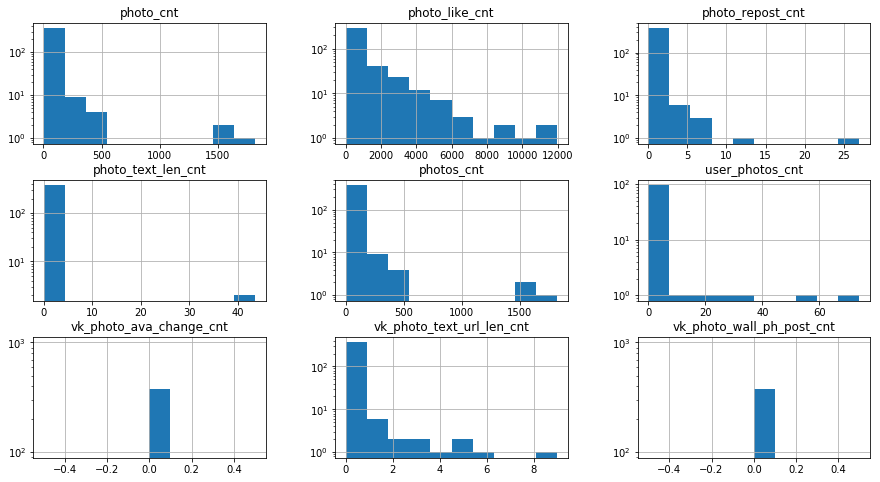

In [7]:
photo_vars = [var_name for var_name in variables_cnt if 'photo' in var_name]
df[photo_vars].hist(figsize = (15,8), log=True);

Кто больше постит фотографий, девушки или парни? чьи фото собирают больше лайков? (общее количество лайков, медиана и среднее)

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


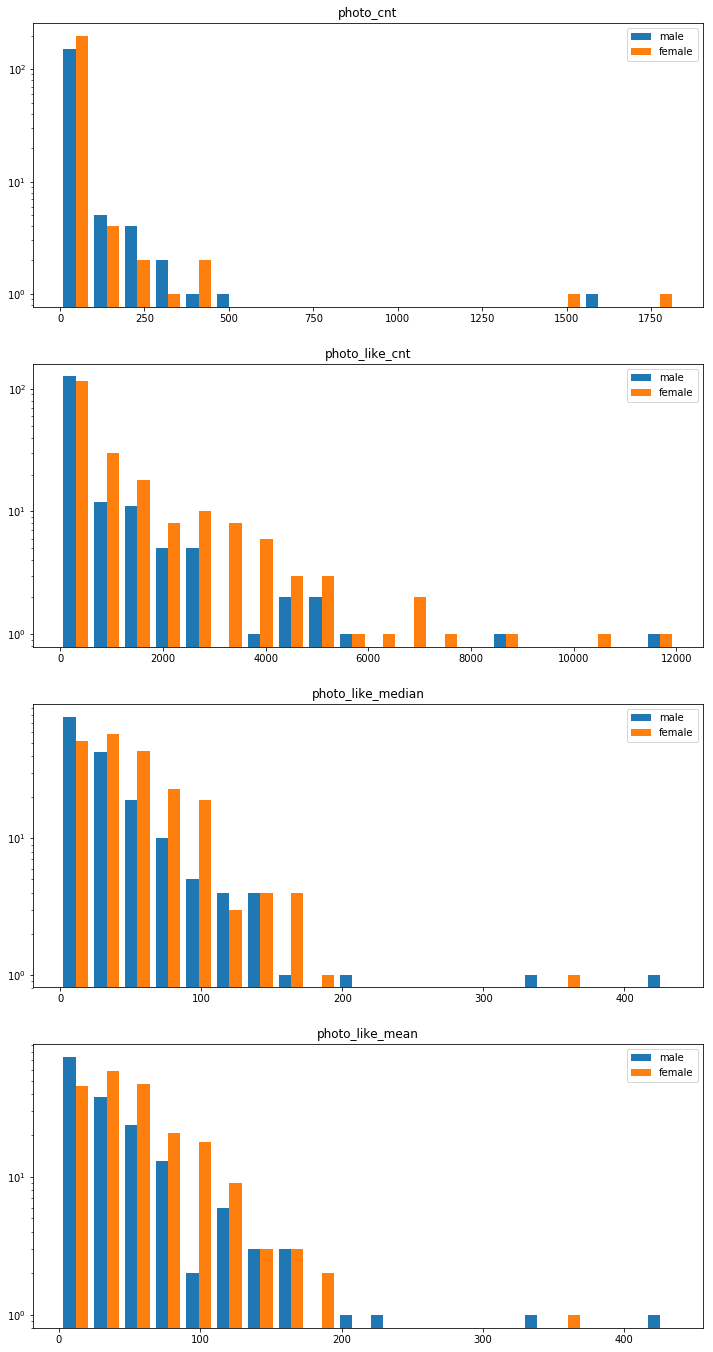

In [8]:
features = ['photo_cnt', 'photo_like_cnt', 'photo_like_median', 'photo_like_mean']
fig, axes = plt.subplots(4, 1, figsize=(12,24))
for i in range(4):
    axes[i].hist([df[features[i]] [df.male_dummy == 1],df[features[i]] [df.male_dummy == 0]], log=True, bins=20)
    axes[i].legend(['male', 'female'], )
    axes[i].set_title(features[i])

fig.show()


Давайте добавим к нашим переменным (описывающим фотографии) количество друзей, количество подарков и пол

In [9]:
vars_interesting = features
vars_interesting.extend(['male_dummy', 'friends_cnt', 'gifts_cnt'])

In [11]:
df[vars_interesting].head()

,photo_cnt,photo_like_cnt,photo_like_median,photo_like_mean,male_dummy,friends_cnt,gifts_cnt
0,4.0,309.0,72.0,77.250000,0,298.0,NaN
1,19.0,2894.0,152.0,152.315789,0,408.0,203.0
2,7.0,2406.0,328.0,343.714286,1,2969.0,NaN
3,50.0,1310.0,25.0,26.200000,0,214.0,24.0
4,35.0,1375.0,19.0,39.285714,1,336.0,227.0


__[1]__ Визуализируйте вытащенные признаки попарно. Постройте `pairplot` для всех пар. На диагонали расположите оценки плотностей для признаков. Для этого используйте опцию `diag_kind = 'kde'`. С помощью параметра `hue` разбейте все наблюдения на мужские и женские, чтобы они отражались на картинках разными цветами.

/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


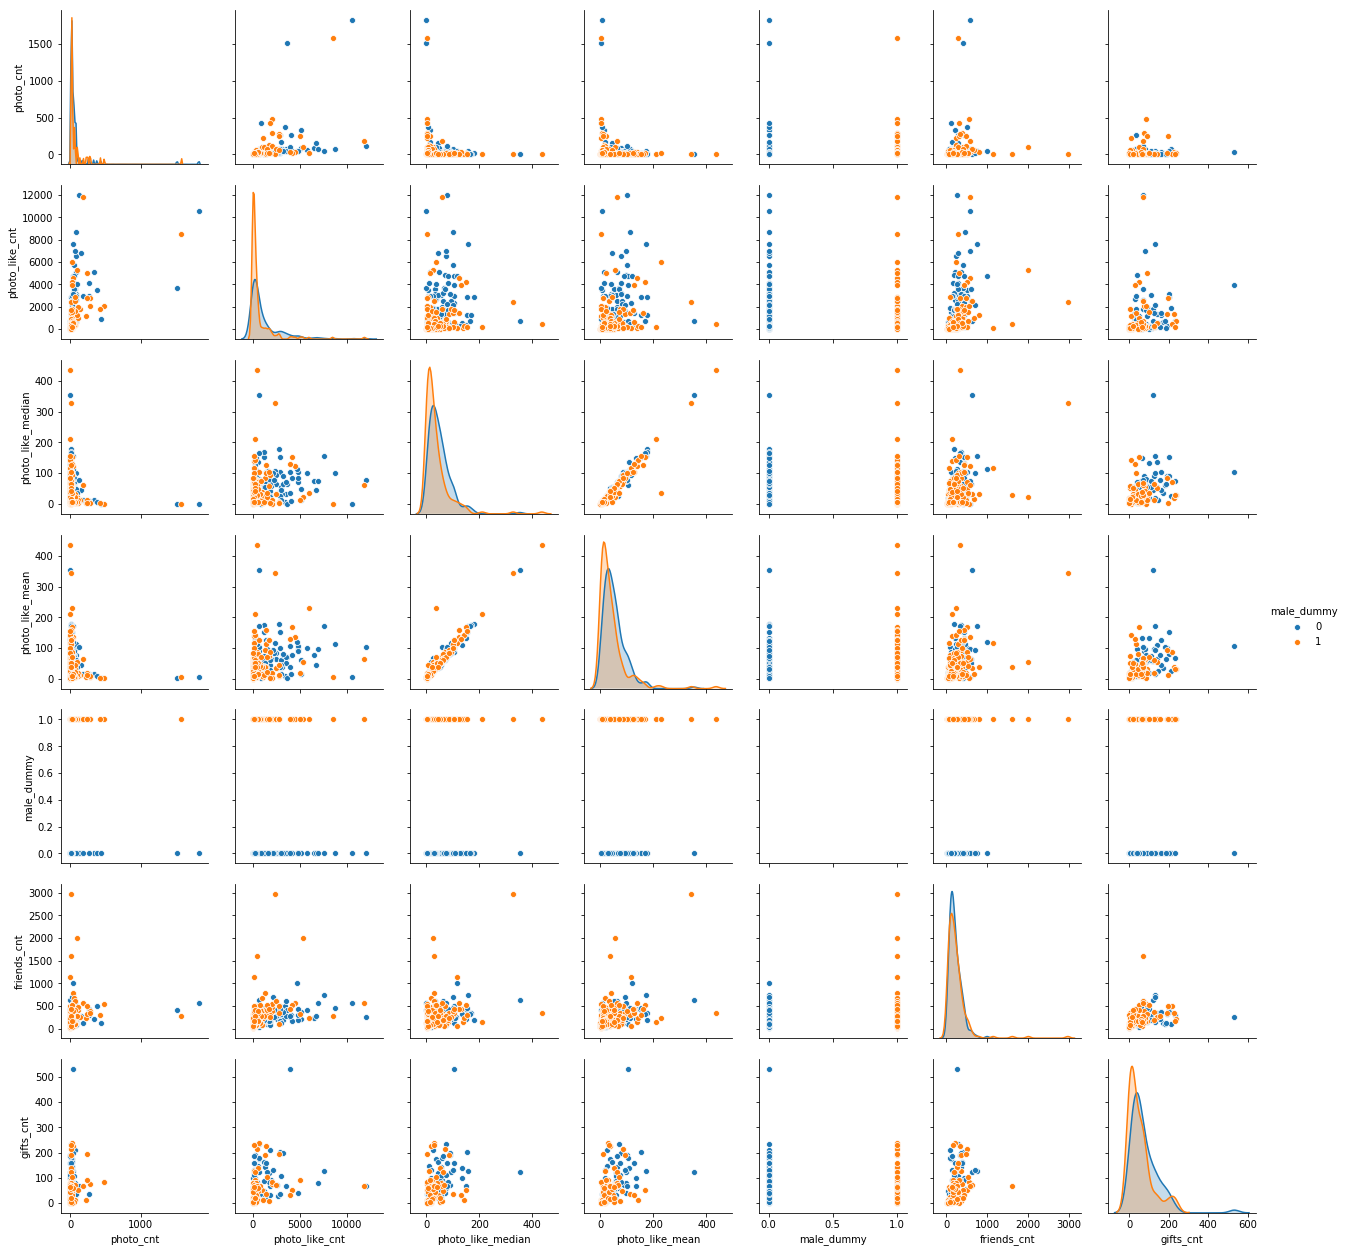

In [12]:
sns.pairplot(df[vars_interesting], diag_kind="kde", hue='male_dummy', dropna=True);

Давайте для удобства визуализации прологарифмуем наш датасет (предварительно заполнив пропуски нулями или выкинув их)

In [13]:
import math

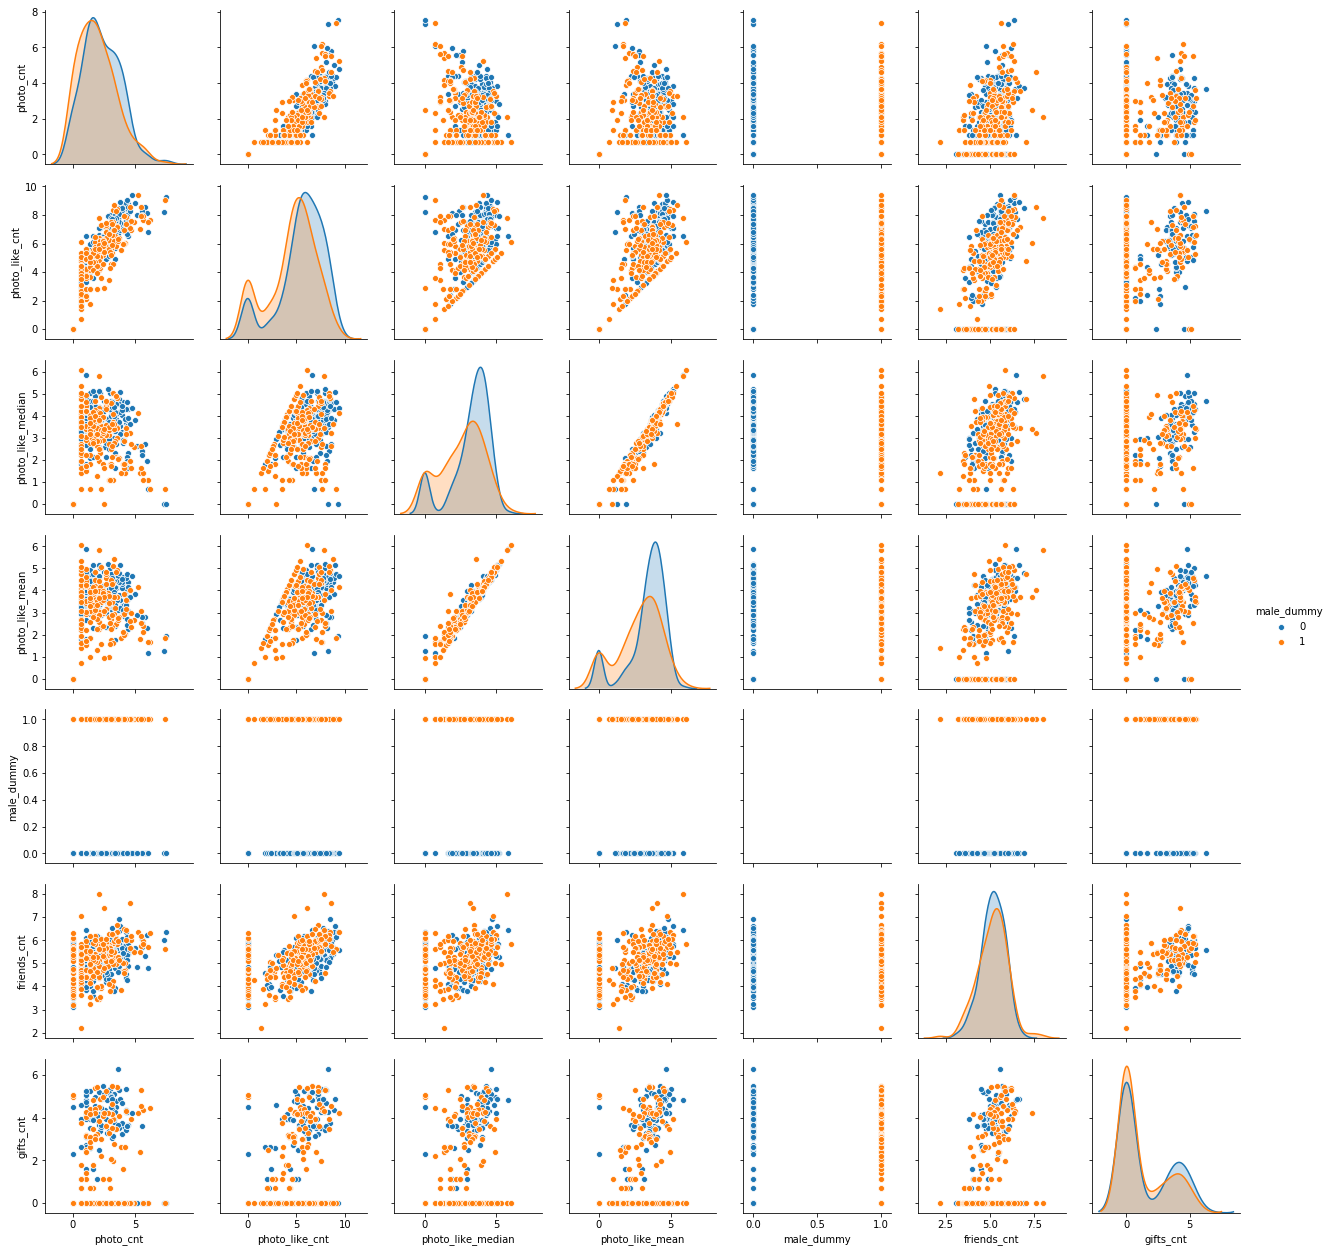

In [14]:
df_na_zero = df[vars_interesting].fillna(0)
for column in df_na_zero.columns:
    if column == 'male_dummy':
        continue
    df_na_zero[column] = df_na_zero[column].map(lambda x: math.log(1 + x))
sns.pairplot(df_na_zero, diag_kind="kde", hue='male_dummy', dropna=True);

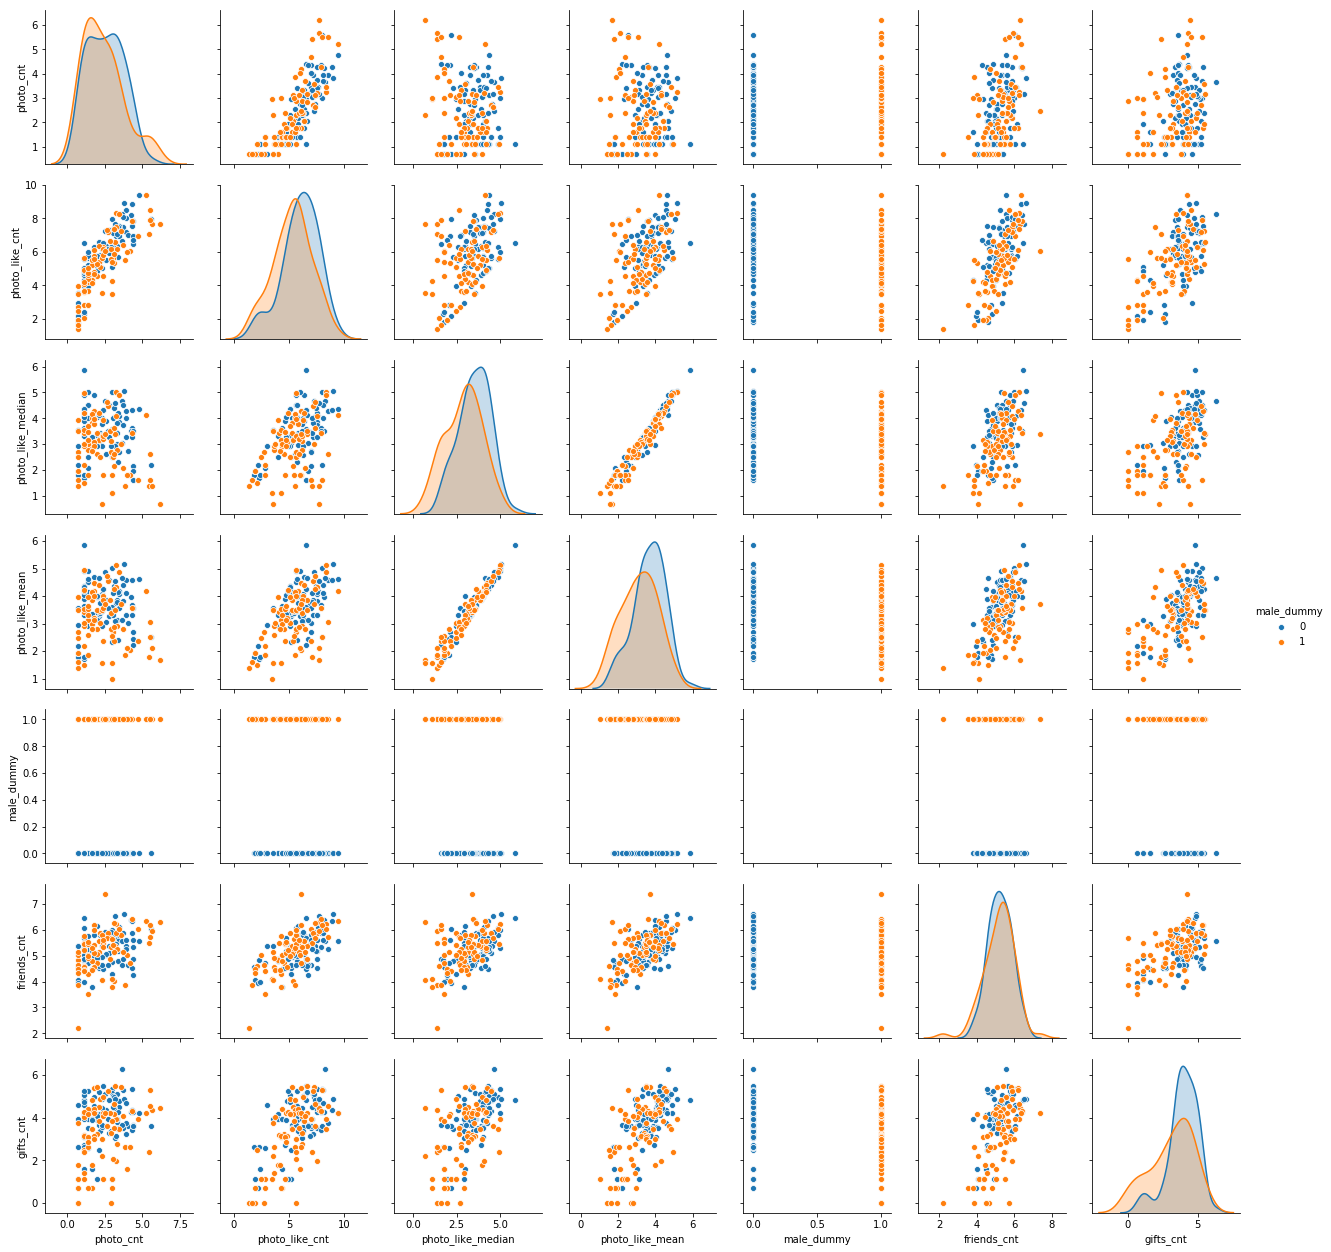

In [15]:
df_na_drop = df[vars_interesting].dropna()
for column in df_na_zero.columns:
    if column == 'male_dummy':
        continue
    df_na_drop[column] = df_na_drop[column].map(lambda x: math.log(1 + x))
sns.pairplot(df_na_drop, diag_kind="kde", hue='male_dummy', dropna=True);

__[2]__ Дайте ответы на соедущие вопросы. Свои мысли пишите прямо здесь! 

* Между какими признаками скорее всего есть линейная зависимость? Почему вы так решили? 

__Ответ:__  очевидно, медиана и среднее почти 1:1

* Eсть ли тут нелинейные зависимости?

__Ответ:__  на логарифмированных графиках почти линейные зависимости между количеством фото и лайков на них, количеством друзей и подарков, значит исходные близки к $y = x^a$

* Есть ли объекты-выбросы, которые наблюдаются далеко от сгустков из точек. 

__Ответ:__ Да есть. __Подойдут любые попытки рассказать о том, что в некоторых облаках точки далеко от основного сгустка.__ 

* Какие ещё интересные особенности вы видите на картинке?



__[1]__ Отлично! Половина домашки осталась позади. Давайте теперь для тех же самых признаков построим матрицу корреляций и провизуализируем её с помощью `heatmap`.

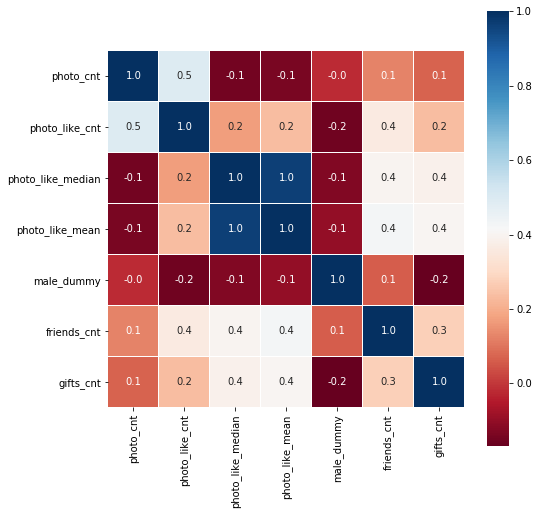

In [16]:
plt.subplots(figsize=(8, 8))
sns.heatmap(df[vars_interesting].corr( ), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu");

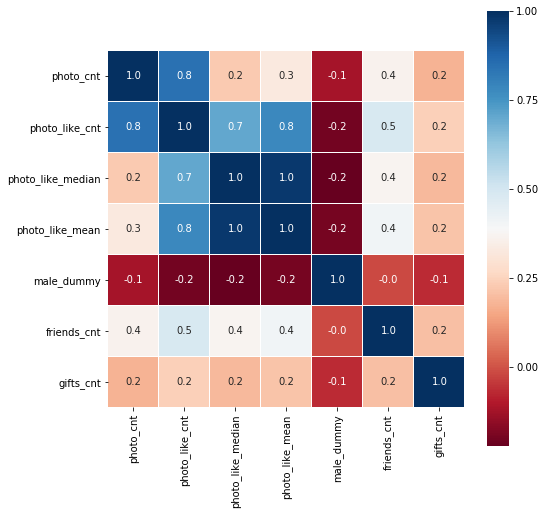

In [17]:
plt.subplots(figsize=(8, 8))
sns.heatmap(df_na_zero.corr( ), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu");

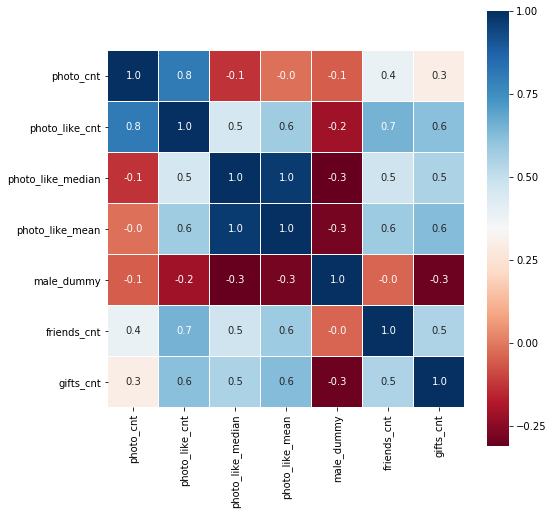

In [18]:

plt.subplots(figsize=(8, 8))
sns.heatmap(df_na_drop.corr( ), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu");

__[2]__ Между какими переменными корреляция самая высокая? Почему? Она отрицательная или положительная. Прокомментируйте все клетки, где она оказалась $\ge 0.3$ либо $\le -0.2$. 

__Ответ:__ 

__[1]__ Дамми-переменная это переменная, которая принмает два значения. Либо $1$, если человек обладает закодированным в ней свойством, либо $0$, если не обладает. В нашей таблице все дамми-переменные оканчиваются на суффикc `dummy`.  

Возьмите переменную `instagram_dummy`. Она принимает значение $1$, если у пользователя на страничке есть ссылка на инстаграм. Возьмите переменную `male_dummy`. Она примает значение $1$, если пользователь парень. Постройте картинку, на которой будет видно как между собой соотносятся владельцы инстаграмма по полу. 

In [19]:
dff = df.pivot_table(index='instagram_dummy', columns='male_dummy', values='first_name', aggfunc='count')
dff

male_dummy,0,1
instagram_dummy,,
0,174,168
1,56,27


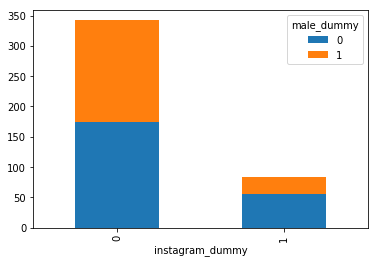

In [20]:
dff.plot(kind='bar', stacked=True)

Правда ли, что девушки чаще указыают наличие инстаграмма на своей страничке?

__Ответ:__  Да. Во втором столбике синяя фигня толще. 

__[1]__  Категориальная переменная обычно принимает значения из какого-то фиксированного множества. Например, переменная `political_cat` описывает к какой категории относятся политические взгляды юзера. Постройте для этой переменной столбиковую диаграмму. Разбиритесь по [документации](http://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) как сделать у столбиков горизонтальное расположение. Можно ли сделать исходя из картинки вывод, что в вышке одни либералы? Почему? 

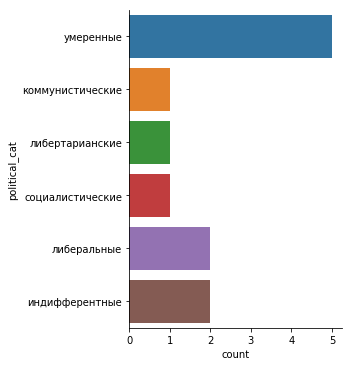

In [21]:
sns.catplot(y = 'political_cat', data=df, kind='count');

как политические взгляды распределены по полам?  
__Ответ:__  Можно визуализировать, но выводы делать нельзя, мало данных

In [22]:
dff = df.pivot_table(index='political_cat', columns='male_dummy', values='first_name', aggfunc='count')
dff

male_dummy,0,1
political_cat,,
индифферентные,1.0,1.0
коммунистические,1.0,NaN
либеральные,1.0,1.0
либертарианские,NaN,1.0
социалистические,NaN,1.0
умеренные,2.0,3.0


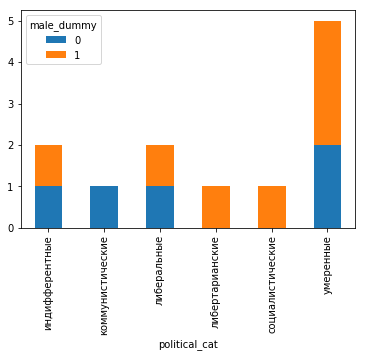

In [23]:
dff.plot(kind='bar', stacked=True)

__[n]  Удиви нас. Попробуй найти в данных какую-то классную особенность и визуализируйте её. Если у тебя это получится, мы поставим дополнительные баллы.__ Если вы найдёте полную фигню (сколько всего друзей у Маши или типа того), баллов не будет. Найденный факт реально должен выносить мозг и сносить крышу.

In [ ]:
# ваш код 

Настрадался? Выскажи всё, что думаешь обо всём этом [в анонимке по четвёртой домашке.](https://docs.google.com/forms/d/e/1FAIpQLSeumKE6K8fB7xZsXneN1KjkV9y_gmLl6wGG7MDiY84HWBUsNg/viewform) 